# Histograms

Install the histogram packages for root-to-julia interoperability if you don't have them yet.

~~~
julia> Pkg.clone("https://github.com/jpata/ROOTHistograms.jl")
julia> Pkg.clone("https://github.com/jpata/Histograms.jl")
~~~

In [75]:
using Histograms, ROOTHistograms, PyPlot, ROOT

Histograms can be created with the `ErrorHistogram` constructor, which accepts one or more vectors of the bin edges, signified by `edges...`.

In [149]:
methods(ErrorHistogram)

1-element Array{Any,1}:
 call(::Type{Histograms.ErrorHistogram{T<:Real,N,E}}, edges...) at /Users/joosep/.julia/v0.4/Histograms/src/Histograms.jl:61

In [153]:
h1d = ErrorHistogram([1,2,3,4,5])
h2d = ErrorHistogram([1,2,3,4,5], [0.0,2.0,4.0])

Histograms.ErrorHistogram{Float64,2,Tuple{Array{Int64,1},Array{Float64,1}}}
edges:
  [1,2,3,4,5]
  [0.0,2.0,4.0]
weights: 4x2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
closed: left

The histogram contents are just a vector (in general, N-dimensional matrix), which can be accessed with `contents(h)`.

In [158]:
contents(h1d)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [160]:
contents(h2d)

4x2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

Same goes for errors.

In [161]:
errors(h1d)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [162]:
errors(h2d)

4x2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

Julia histograms have no special overflow or underflow bin. If you want to define an underflow, the lowest bin must be `[-Inf, firstbin)`. You can achieve this by creating a histogram explicitly with:

In [102]:
testhist = ErrorHistogram([-Inf, 0,1,2,3, Inf])

Histograms.ErrorHistogram{Float64,1,Tuple{Array{Float64,1}}}
edges:
  [-Inf,0.0,1.0,2.0,3.0,Inf]
weights: [0.0,0.0,0.0,0.0,0.0]
closed: left

Hence, anything between [-Inf,0.0) will fall to the first bin.

In [103]:
push!(testhist, -0.5)

Histograms.ErrorHistogram{Float64,1,Tuple{Array{Float64,1}}}
edges:
  [-Inf,0.0,1.0,2.0,3.0,Inf]
weights: [1.0,0.0,0.0,0.0,0.0]
closed: left

You can see that the weight in the first bin increased by 1.

In [104]:
contents(testhist)[1] == 1

true

The same holds for the overflow: anything between [3.0,+Inf) will end in the last bin.

In [105]:
push!(testhist, 4.0)

Histograms.ErrorHistogram{Float64,1,Tuple{Array{Float64,1}}}
edges:
  [-Inf,0.0,1.0,2.0,3.0,Inf]
weights: [1.0,0.0,0.0,0.0,1.0]
closed: left

We can do this automatically by defining a function which pads a vector with -Inf and +Inf. 

In [92]:
pad(v) = [-Inf, v..., Inf];

Note that `linspace(a,b,n)` creates a uniform grid between `a` and `b` in `n` points.

In [131]:
h1 = ErrorHistogram(pad(linspace(-1,1,11)))
h2 = ErrorHistogram(pad(linspace(-1,1,11)))

Histograms.ErrorHistogram{Float64,1,Tuple{Array{Float64,1}}}
edges:
  [-Inf,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0,Inf]
weights: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
closed: left

We can fill the histograms with the `push!` method, which also accepts an optional weight.

In [132]:
for i=1:1000
    v = randn()
    push!(h1, v)
end

for i=1:100
    v = randn()
    w = 10.0
    push!(h2, v, w)
end

The `ROOTHistograms.jl` package has a few simple methods for drawing histograms. 

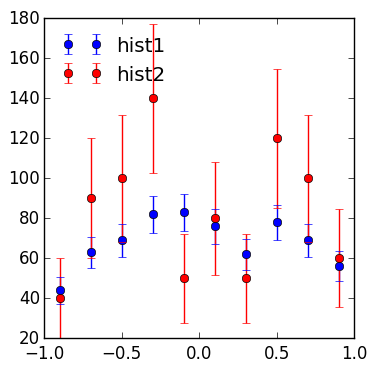

PyObject <matplotlib.legend.Legend object at 0x325c80250>

In [136]:
figure(figsize=(4,4))
errorbar(h1, linewidth=0, marker="o", elinewidth=1, color="blue", label="hist1");
errorbar(h2, linewidth=0, marker="o", elinewidth=1, color="red", label="hist2");
legend(loc="best", frameon=false)

Histograms with the exact same edges can be added.

In [164]:
htot = h1+h2

Histograms.ErrorHistogram{Float64,1,Tuple{Array{Float64,1}}}
edges:
  [-Inf,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0,Inf]
weights: [251.0,84.0,153.0,169.0,222.0,133.0,156.0,112.0,198.0,169.0,116.0,237.0]
closed: left

In [165]:
contents(htot) == contents(h1) + contents(h2)

true

In [168]:
errors(h1)

12-element Array{Float64,1}:
 12.6886 
  6.63325
  7.93725
  8.30662
  9.05539
  9.11043
  8.7178 
  7.87401
  8.83176
  8.30662
  7.48331
 12.53   

In [170]:
errors(h2)

12-element Array{Float64,1}:
 30.0   
 20.0   
 30.0   
 31.6228
 37.4166
 22.3607
 28.2843
 22.3607
 34.641 
 31.6228
 24.4949
 28.2843

Errors are added in quadrature. Note that here we don't get perfect cancellation because of rounding of floats.

In [174]:
errors(htot) - sqrt(errors(h1).^2 + errors(h2).^2)

12-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.0        
 -7.10543e-15
  0.0        
 -3.55271e-15
  0.0        
  0.0        
  0.0        
  0.0        
 -3.55271e-15

Stacked histograms can be plotted with using the `bottom=v` keyword, where `v` is the sum of the previous histogram contents.

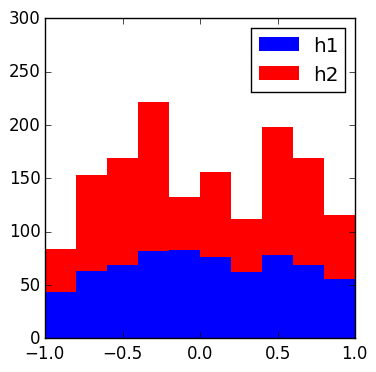

In [180]:
figure(figsize=(4,4))
bar(h1, color="blue", lw=0, label="h1");
bar(h2, bottom=contents(h1), color="red", lw=0, label="h2");
legend(loc="best")
ylim(top=300);

Histograms can be conveniently written to a ROOT file by specifying them as a Dict, where the key is a string which gives the full path of the histogram. Folders can also be created.

In [143]:
hists = Dict(
    "folder1/hist1"=>h1,
    "folder2/subfolder2/hist2"=>h2
)
write_hists_to_file(
    "hists.root",
    hists
)

Now we can read the histograms from the file manually.

In [144]:
tf = TFile("hists.root")

ROOT.TFile(Ptr{Void} @0x00007fba59be2480)

Load and convert the ROOT histogram to a julia histogram.

In [146]:
rh1 = root_cast(TH1D, Get(tf, "folder1/hist1"))

ROOT.TH1D(Ptr{Void} @0x00007fba59b24900)

We can verify that the data are preserved after loading.

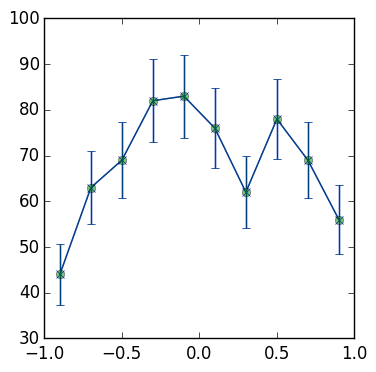

In [147]:
figure(figsize=(4,4))
errorbar(from_root(rh1), marker="x")
errorbar(h1, marker="o", alpha=0.5);